## Data importing

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data = pd.read_excel('data.xlsx', index_col='Unnamed: 0')
data

,Gold Price,Nifty Price,Cases,Currently Infected
2020-02-28,42810,11201.75,3,0
2020-03-06,45260,10989.45,31,28
2020-03-13,42400,9955.20,82,70
2020-03-20,42470,8745.45,249,221
2020-03-27,43524,8660.25,887,793
...,...,...,...,...
2023-03-10,58265,17412.90,44689968,3749
2023-03-17,61580,17100.05,44694349,5389
2023-03-24,60930,16945.05,44702257,8601
2023-03-31,61230,17359.75,44718781,16354


## Statistics of the data

In [26]:
data.describe()

,Gold Price,Nifty Price,Cases,Currently Infected
count,152.000000,152.000000,1.520000e+02,1.520000e+02
mean,51533.013158,15181.901645,2.707332e+07,3.917141e+05
std,3674.457518,2844.823626,1.739696e+07,6.732529e+05
min,42400.000000,8083.800000,3.000000e+00,0.000000e+00
25%,49200.000000,13450.025000,9.772374e+06,1.799800e+04
50%,51207.500000,16211.200000,3.351948e+07,1.405235e+05
75%,53371.250000,17519.937500,4.376467e+07,4.413155e+05
max,62090.000000,18696.100000,4.488188e+07,3.721604e+06


## Univariate analysis

### Analysis on percentage change for each week

In [27]:
pct_change = data.pct_change()[2:]
pct_change.describe()

,Gold Price,Nifty Price,Cases,Currently Infected
count,150.000000,150.000000,150.000000,150.000000
mean,0.002290,0.003598,0.145808,0.160840
std,0.019045,0.029933,0.478723,0.660344
min,-0.063190,-0.121519,0.000000,-0.590771
25%,-0.008920,-0.011882,0.000726,-0.129806
50%,0.003192,0.007799,0.008058,-0.045453
75%,0.012387,0.018503,0.053814,0.199241
max,0.056895,0.146336,3.691729,3.333340


from the above stats of percentage changes we can see that gold is leas volatile followed by nifty, currently infected and cases

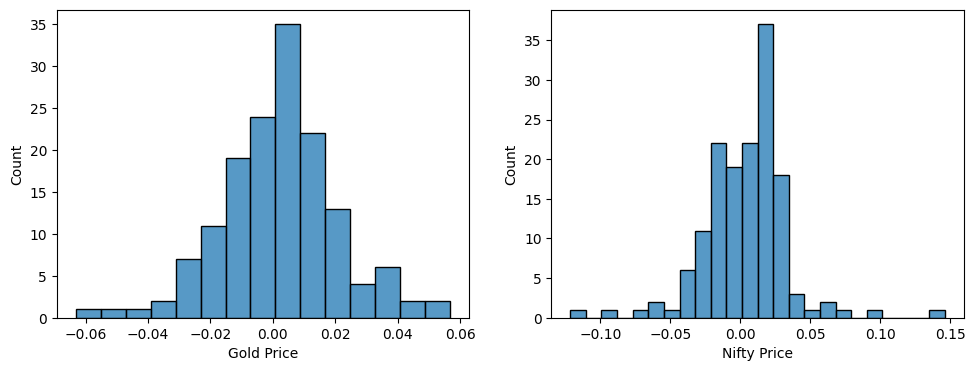

In [28]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
date = data.index

fig.set_size_inches(11.7, 4)

sns.histplot(data= pct_change, x= 'Gold Price', ax= ax[0])
sns.histplot(data= pct_change, x= 'Nifty Price', ax= ax[1])

plt.show()

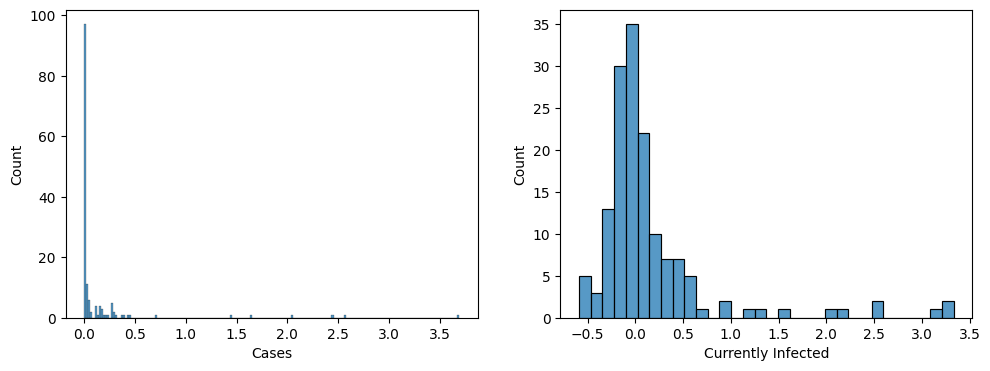

In [29]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
date = data.index

fig.set_size_inches(11.7, 4)

sns.histplot(data= pct_change, x= 'Cases', ax= ax[0])
sns.histplot(data= pct_change, x= 'Currently Infected', ax= ax[1])

plt.show()

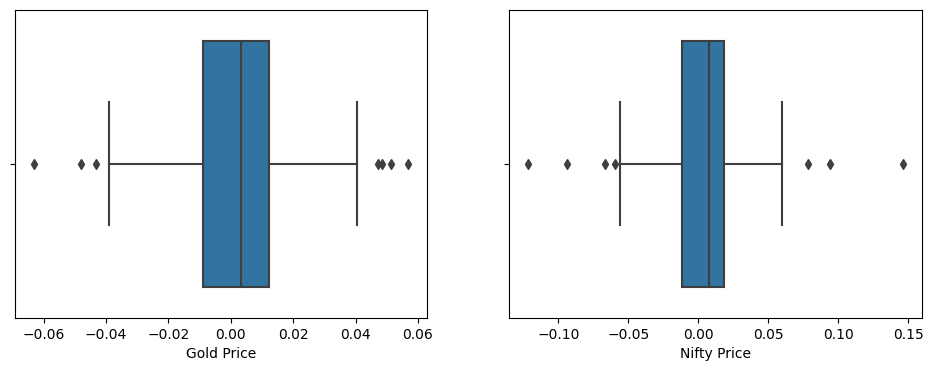

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
date = data.index

fig.set_size_inches(11.7, 4)

sns.boxplot(data= pct_change, x= 'Gold Price', ax= ax[0])
sns.boxplot(data= pct_change, x= 'Nifty Price', ax= ax[1])

plt.show()

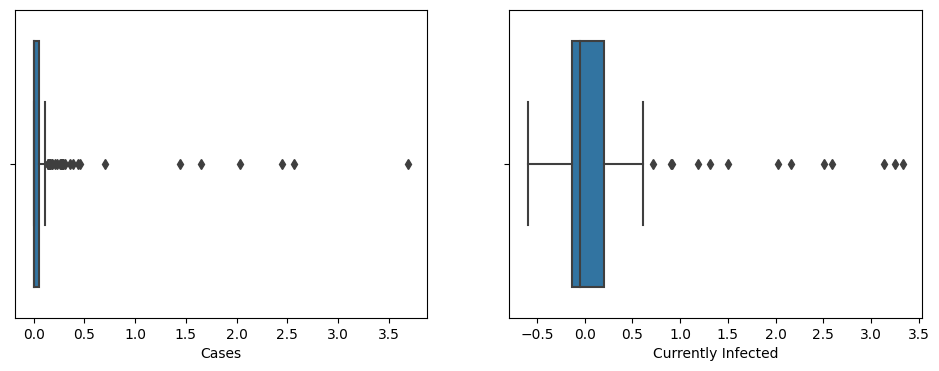

In [31]:
fig, ax = plt.subplots(nrows = 1, ncols = 2)
date = data.index

fig.set_size_inches(11.7, 4)

sns.boxplot(data= pct_change, x= 'Cases', ax= ax[0])
sns.boxplot(data= pct_change, x= 'Currently Infected', ax= ax[1])

plt.show()

Percentage changes of gold and stock prices are close to Normal distribution. So, let see what are the dates where the extreme fall and raise has occured.

In [34]:
descriptive_stats = pct_change.describe()

def getDatesOfExtremes(column):
    mean = descriptive_stats[column]['mean']
    std = descriptive_stats[column]['std']
    extreme_falls = pct_change[pct_change[column] < mean - 1*std] 
    extreme_raises = pct_change[pct_change[column] > mean + 1*std]
    return (extreme_falls, extreme_raises)

In [35]:
(gold_extreme_falls, gold_extreme_raises) = getDatesOfExtremes('Gold Price')
(nifty_extreme_falls, nifty_extreme_raises) = getDatesOfExtremes('Nifty Price')

## Bivariate analysis

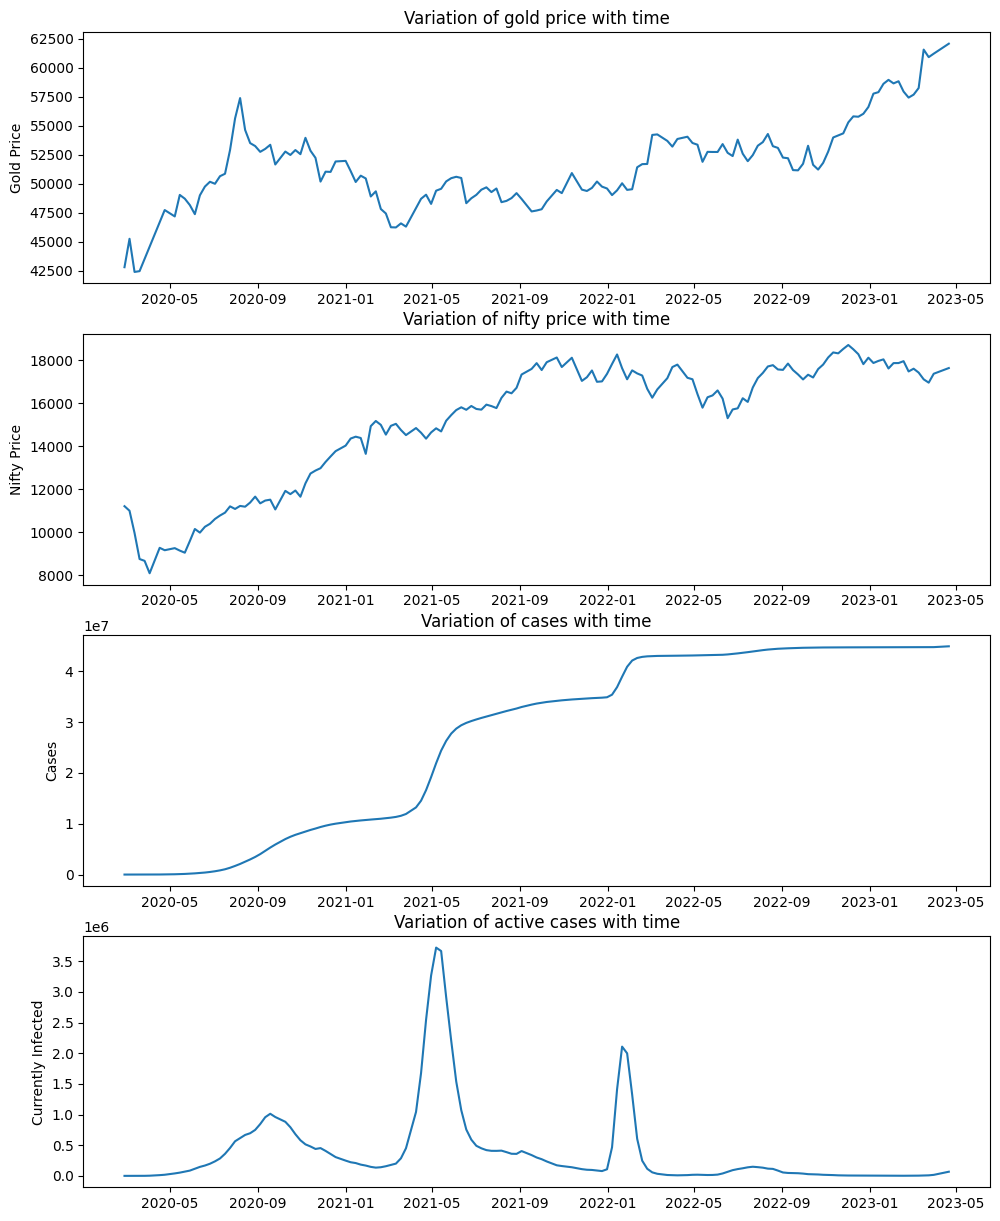

In [37]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows = 4, ncols = 1)
date = data.index

fig.set_size_inches(11.7, 15)

sns.lineplot(data = data,x = date, y = 'Gold Price', ax= ax1)
ax1.set_title('Variation of gold price with time')

sns.lineplot(data = data,x = date, y = 'Nifty Price', ax= ax2)
ax2.set_title('Variation of nifty price with time')

sns.lineplot(data = data,x = date, y = 'Cases', ax= ax3)
ax3.set_title('Variation of cases with time')

sns.lineplot(data = data,x = date, y = 'Currently Infected', ax= ax4)
ax4.set_title('Variation of active cases with time')

plt.show()



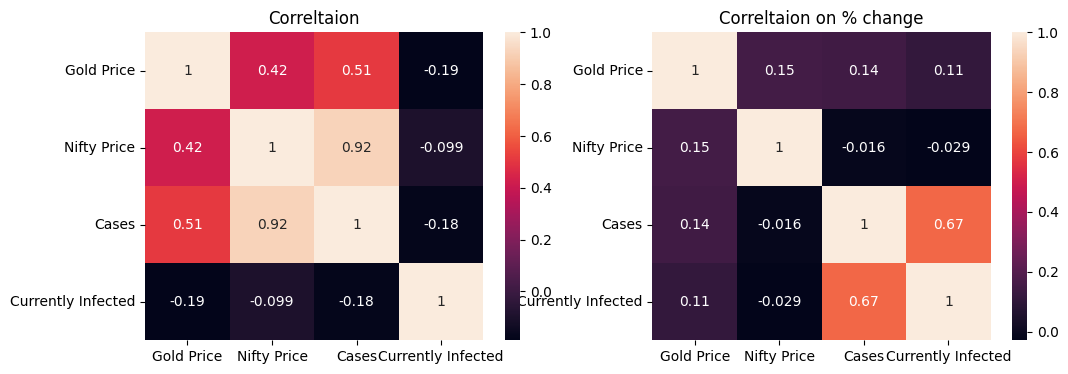

In [38]:
fig, ax = plt.subplots(nrows= 1, ncols= 2)

fig.set_size_inches(12,4)

sns.heatmap(data.corr(), annot= True, ax= ax[0])
ax[0].set_title('Correltaion')

sns.heatmap(pct_change.corr(), annot= True, ax= ax[1])
ax[1].set_title('Correltaion on % change')

plt.show()

The overall data (3 years) correltion is not strong in any direction. So, lets check the correltaion of percentage change during few intresting time frames, such as:

1. How was the correlation during the first month (02/2020 - 03/2020)
1. How was the correlation dring the first peek of covid (08/2020 - 11/2020)
1. How was the correlation dring the second peek of covid (04/2021 - 06/2021)
1. How was the correlation during the third peek of covid (01/2022 - 03/2022)

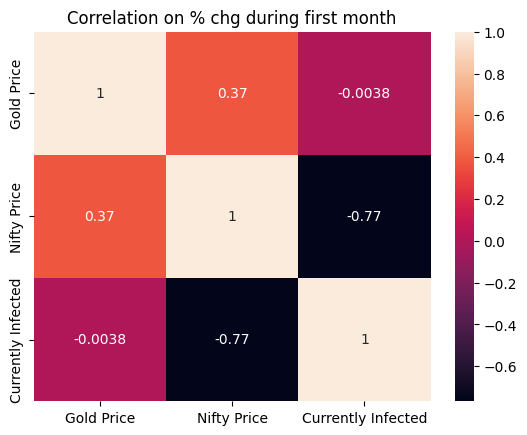

In [39]:
sns.heatmap(data.drop(['Cases'], axis= 'columns').loc['2020-02':'2020-03'].corr(), annot= True)

plt.title('Correlation on % chg during first month')
plt.show()

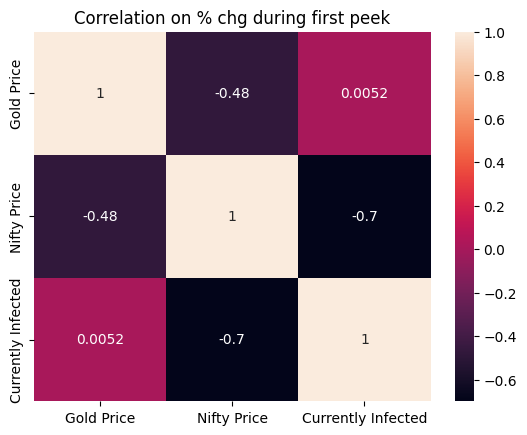

In [40]:
sns.heatmap(data.drop(['Cases'], axis= 'columns').loc['2020-08':'2020-11'].corr(), annot= True)

plt.title('Correlation on % chg during first peek')
plt.show()

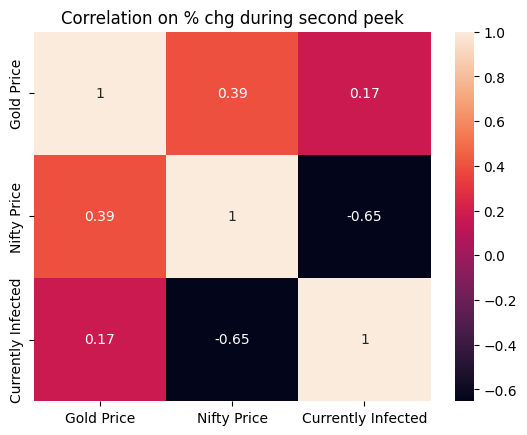

In [41]:
sns.heatmap(data.drop(['Cases'], axis= 'columns').loc['2021-04':'2021-06'].corr(), annot= True)

plt.title('Correlation on % chg during second peek')
plt.show()

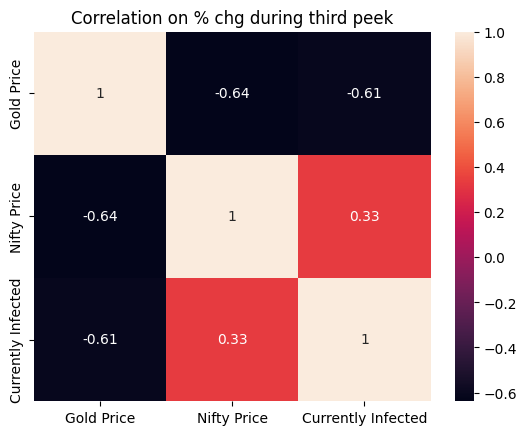

In [42]:
sns.heatmap(data.drop(['Cases'], axis= 'columns').loc['2022-01':'2022-02'].corr(), annot= True)

plt.title('Correlation on % chg during third peek')
plt.show()